# Movie Data Analysis
This notebook analyzes movie data with a focus on:

- Revenue per genre
- Release trends
- All-time most popular movies

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (ensure the file is in the same directory or provide path)
df = pd.read_csv("Cleaned_Movie_Data.csv")

# Convert dates and handle numeric values
df["Release Date"] = pd.to_datetime(df["Release Date"], errors="coerce")
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
df["Budget"] = pd.to_numeric(df["Budget"], errors="coerce")

df.dropna(subset=["Title", "Genre"], inplace=True)
df.head(20)

,Title,Release Date,Genre,Revenue,Budget
0,10 Cloverfield Lane,2016-03-08,Thriller,15000000.0,108300000.0
1,13 Hours: The Secret Soldiers of Benghazi,2016-01-15,Action,45000000.0,69400000.0
2,2 Guns,2013-08-02,Action,61000000.0,131900000.0
3,21 Jump Street,2012-03-16,Comedy,55000000.0,201500000.0
4,22 Jump Street,2014-06-04,Action,84500000.0,331300000.0
5,300: Rise of an Empire,2014-03-04,Action,110000000.0,337600000.0
6,90 Minutes in Heaven,2015-09-11,Drama,5000000.0,4800000.0
7,A Good Day to Die Hard,2013-02-14,Action,92000000.0,304700000.0
8,A Haunted House,2013-01-11,Comedy,2500000.0,60100000.0
9,A Haunted House 2,2014-04-18,Comedy,4000000.0,24000000.0


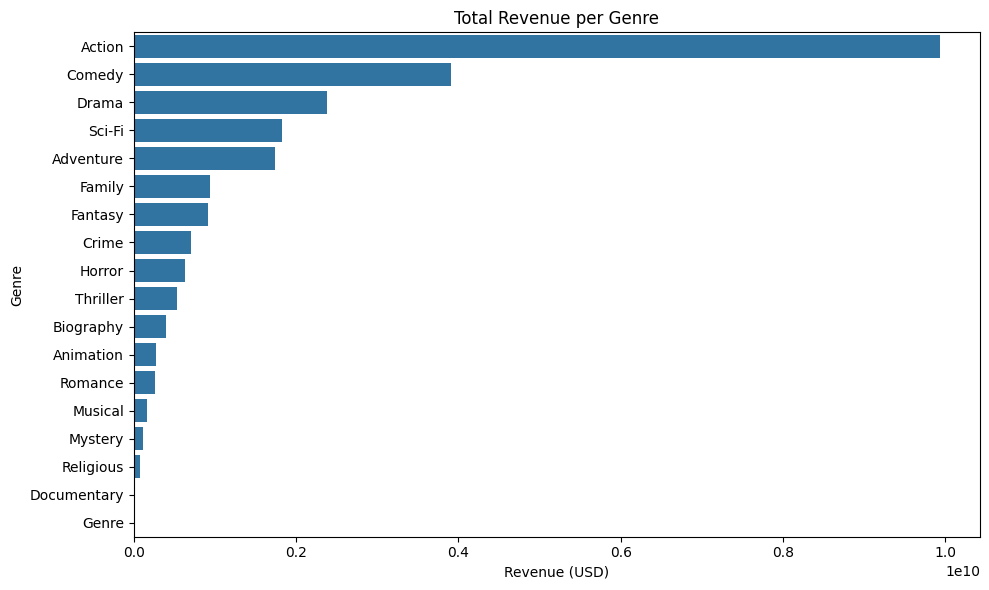

In [18]:
# Total revenue per genre
genre_revenue = df.groupby("Genre")["Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_revenue.values, y=genre_revenue.index)
plt.title("Total Revenue per Genre")
plt.xlabel("Revenue (USD)")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

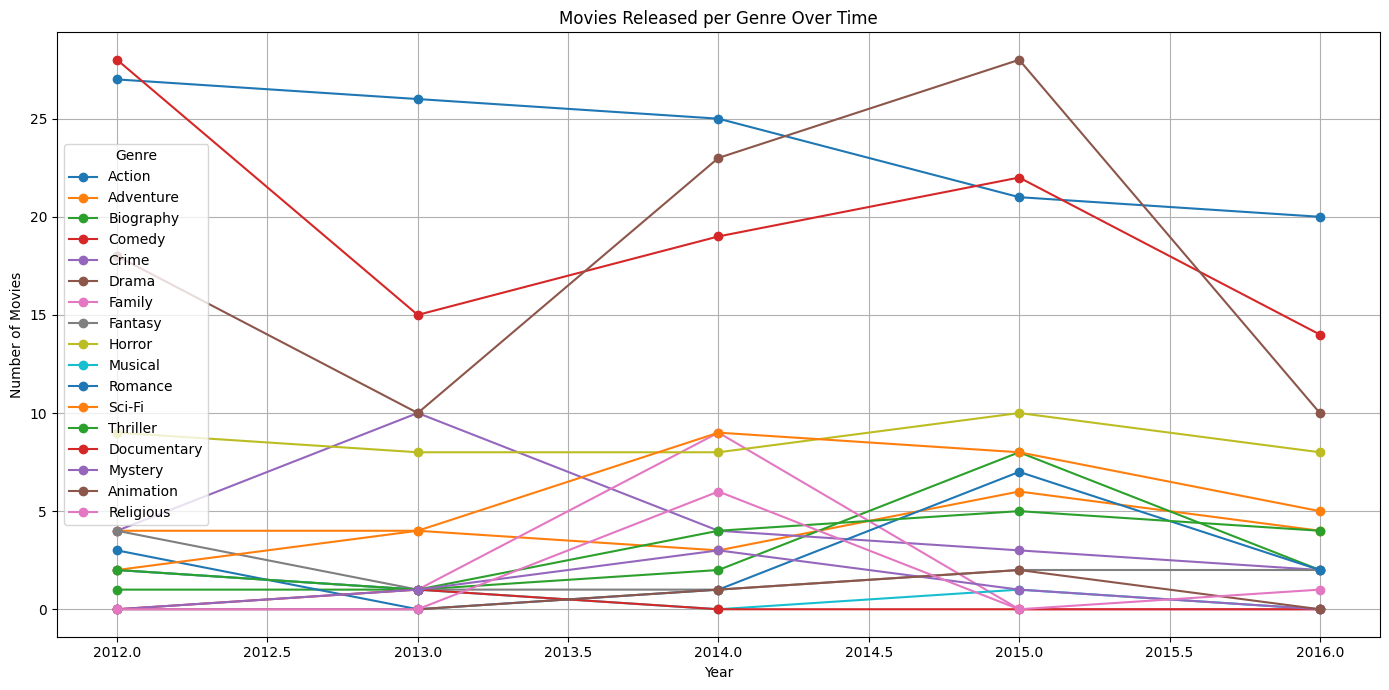

In [19]:
# Number of movies released per year by genre
df["Year"] = df["Release Date"].dt.year
genre_year = df.groupby(["Year", "Genre"]).size().unstack().fillna(0)

genre_year.plot(figsize=(14,7), marker='o')
plt.title("Movies Released per Genre Over Time")
plt.ylabel("Number of Movies")
plt.xlabel("Year")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Top 10 highest revenue movies
top_movies = df.sort_values(by="Revenue", ascending=False).head(10)
top_movies[["Title", "Genre", "Revenue"]]

,Title,Genre,Revenue
379,The Hobbit: The Battle of the Five Armies,Adventure,250000000.0
33,Batman v Superman: Dawn of Justice,Action,250000000.0
75,Dawn of the Planet of the Apes,Action,235000000.0
335,The Amazing Spider-Man,Action,230000000.0
192,Man of Steel,Action,225000000.0
36,Battleship,Action,220000000.0
199,Men in Black 3,Comedy,215000000.0
502,X-Men: Days of Future Past,Action,200000000.0
499,World War Z,Action,190000000.0
236,Pacific Rim,Action,190000000.0



## Revenue Productivity by Genre

The following visualization shows the productivity of each genre, calculated as the total revenue divided by the total budget for that genre. This metric highlights which genres generate the most revenue per dollar invested. Genres are sorted from most to least productive.

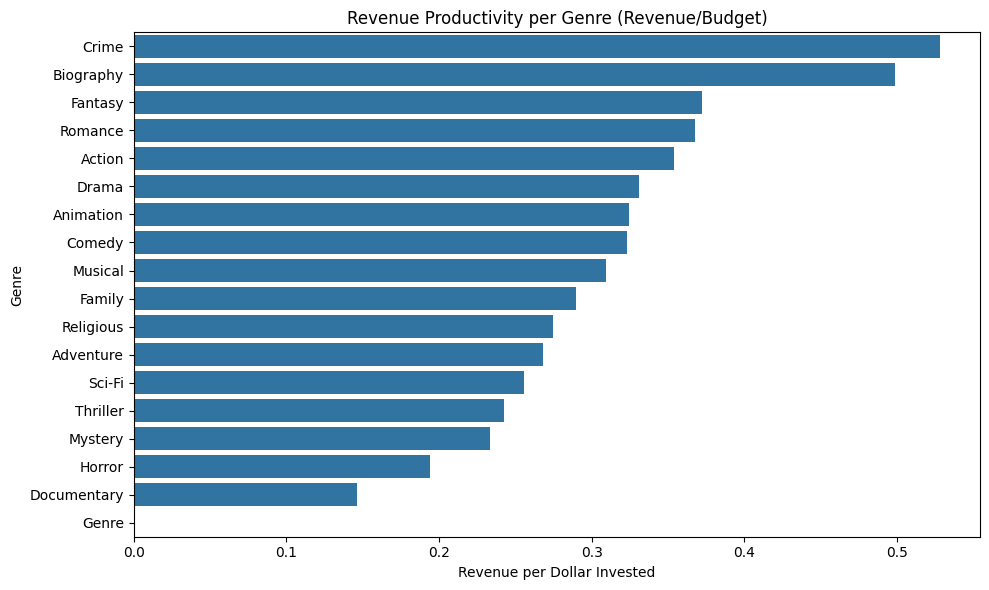

In [21]:
# Calculate productivity (revenue per budget) per genre
genre_productivity = df.groupby("Genre").agg({"Revenue": "sum", "Budget": "sum"})
genre_productivity["Productivity"] = genre_productivity["Revenue"] / genre_productivity["Budget"]
genre_productivity_sorted = genre_productivity.sort_values("Productivity", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=genre_productivity_sorted["Productivity"], y=genre_productivity_sorted.index)
plt.title("Revenue Productivity per Genre (Revenue/Budget)")
plt.xlabel("Revenue per Dollar Invested")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

# Calculate standard deviation of productivity per genre (excluding NaN and zero budgets)

In [22]:

genre_productivity_consistency = df.groupby("Genre").agg({"Revenue": "sum", "Budget": "sum"})
genre_productivity_consistency = genre_productivity_consistency[genre_productivity_consistency["Budget"] > 0]
genre_productivity_consistency["Productivity"] = genre_productivity_consistency["Revenue"] / genre_productivity_consistency["Budget"]

# Calculate per-movie productivity for each genre

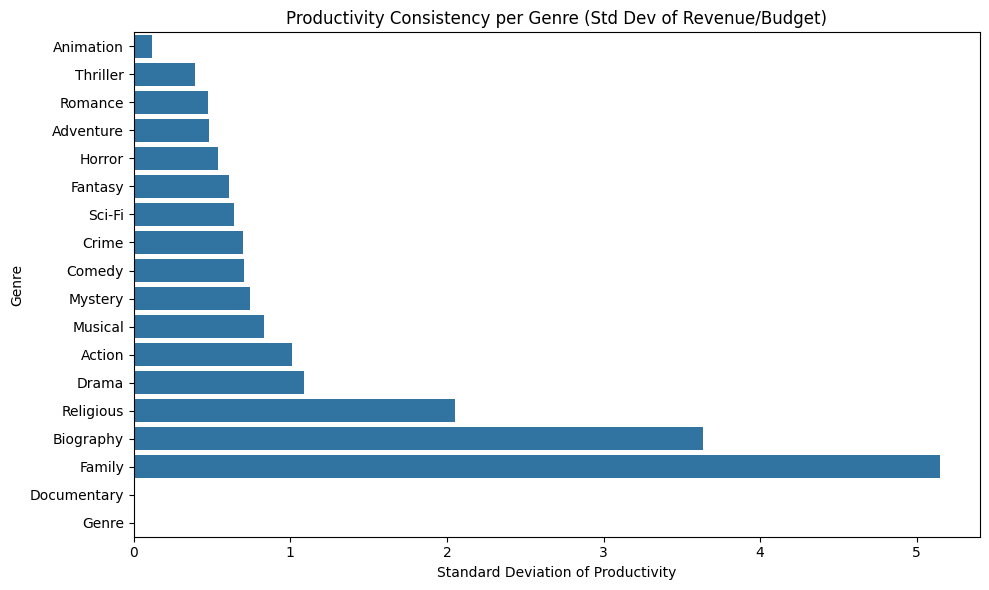

In [23]:
df["Productivity"] = df["Revenue"] / df["Budget"]
consistency = df.groupby("Genre")["Productivity"].std().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=consistency.values, y=consistency.index)
plt.title("Productivity Consistency per Genre (Std Dev of Revenue/Budget)")
plt.xlabel("Standard Deviation of Productivity")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()